In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [10]:
df=pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [11]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


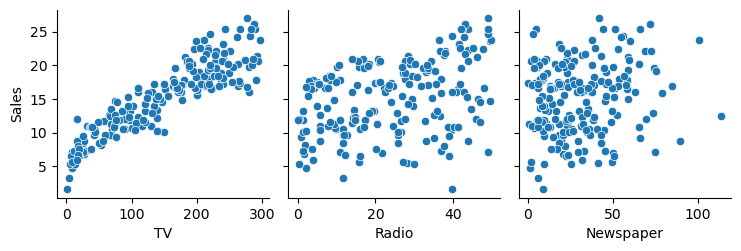

In [15]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')

In [4]:
matrix_corr=df.corr()
matrix_corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


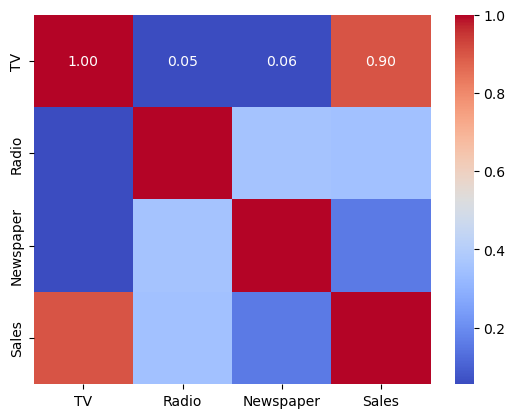

In [17]:
plt.Figure(figsize=(10,6))
sns.heatmap(matrix_corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X=df.drop('Sales',axis=1)
Y=df['Sales']

In [26]:
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [33]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# list of models to test
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor()
]

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Model:", type(model).__name__)
    print("Mean Squared Error:", mse)
    print("R^2 Score:", r2)
    print()


c:\Users\RPC\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Model: LinearRegression
Mean Squared Error: 2.907756910271093
R^2 Score: 0.9059011844150825

Model: DecisionTreeRegressor
Mean Squared Error: 2.6424999999999996
R^2 Score: 0.9144852448618334

Model: RandomForestRegressor
Mean Squared Error: 1.3760715000000028
R^2 Score: 0.9554685270103652

Model: GradientBoostingRegressor
Mean Squared Error: 1.256933071801255
R^2 Score: 0.9593240023235012

Model: SVR
Mean Squared Error: 3.499087197255254
R^2 Score: 0.886764963148391

Model: KNeighborsRegressor
Mean Squared Error: 3.115529999999999
R^2 Score: 0.8991773755626823

Model: XGBRegressor
Mean Squared Error: 1.4514290545159532
R^2 Score: 0.953029858014247

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 160, number of used featur

### We find that the GradientBoostingRegressor is the best model for our task

In [36]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
model=GradientBoostingRegressor()
model.fit(X_train,y_train)
ypred=model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1.25761503592097
R^2 Score: 0.9593019330729013
